# Credit Card Customer Analysis - Data Exploration

## Mục tiêu
Khám phá và phân tích dữ liệu khách hàng sử dụng thẻ tín dụng để hiểu rõ:
- Cấu trúc và chất lượng dữ liệu
- Phân bố của các features
- Mối quan hệ giữa các yếu tố và tỷ lệ rời đi
- Insights cho việc xây dựng model


#### Môi trường code

In [1]:
import sys
sys.executable

'/home/xv6/anaconda3/envs/min_ds-env/bin/python'

## 1. Load dữ liệu từ file

In [2]:
import os
import sys
import numpy as np

In [3]:
os.chdir("/home/xv6/Lab 2/Credit Card Customer Analysis")

project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.append(project_root)

import src.data_processing as dp
import src.visualization as vz

In [4]:
data_path = "data/raw/BankChurners.csv"
data = dp.load_data(data_path)

for col in data.dtype.names:
    print(col)

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


## 2. Khám phá cấu trúc dữ liệu

### 2.1 Kích thước dữ liệu

In [5]:
num_rows = data.shape[0]
num_cols = len(data.dtype.names)
print(f"Số dòng: {num_rows}, Số cột: {num_cols}")

Số dòng: 10127, Số cột: 23


Dữ liệu có 10127 hàng và 23 cột. Tuy nhiên tác giả bộ dữ liệu có khuyên nên bỏ đi hai cột cuối (là hai cột liên quan đến Naive Bayes mà tác giả đã xử lý trước đó). Vì vậy cần bỏ đi 2 cột cuối khỏi bộ dữ liệu.

In [6]:
# Sử dụng hàm preprocess_data để loại bỏ 2 cột cuối
data_new = dp.preprocess_data(data, exclude_last_n=2)

num_rows = data_new.shape[0]
num_cols = len(data_new.dtype.names)
print(f"Số dòng: {num_rows}, Số cột: {num_cols}")

Số dòng: 10127, Số cột: 21


### 2.2 Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng ứng với một khách hàng. Không có trường hợp xuất hiện dòng có ý nghĩa khác.

### 2.3 Kiểm tra dữ liệu trùng lặp

Để kiểm tra xem có dòng nào bị lặp không, ta cần kiểm tra xem trong cột đầu tiên, tức là cột "CLIENTNUM" có giá trị nào trùng lặp không.

In [7]:
# Sử dụng hàm check_duplicates để kiểm tra dữ liệu trùng lặp
duplicated_id = dp.check_duplicates(data_new, 'CLIENTNUM')
if duplicated_id:
    print(f"Có dữ liệu bị lặp.")
else:
    print("Không có dữ liệu bị lặp.")

Không có dữ liệu bị lặp.


### 2.3 Ý nghĩa các cột dữ liệu

- `CLIENTNUM`: Client number. Mã định danh duy nhất của chủ tài khoản.
- `Attrition_Flag`: Biểu thị hoạt động của khách hàng, khách hàng còn hoạt động hay đã rời đi.
- `Customer_Age`: Độ tuổi của khách hàng tính theo năm.
- `Gender`: Giới tính. M là Male (Nam), F là Female (Nữ).
- `Dependent_count`: Số người phụ thuộc.
- `Education level`: Trình độ học vấn của chủ tài khoản (ví dụ: high school, college graduate,...).
- `Marital_Status`: Tình trạng hôn nhân. Married, Single, Divorced hay Unknown.
- `Income_Category`: Thu nhập hàng năm của chủ tài khoản (`<$40K, $40K-60K, $60K-80K, $80K-120K, >$120K`).
- `Card_Category`: Loại thẻ (Blue, Silver, Gold, Platinum).
- `Months_on_book`: Thời gian có quan hệ với ngân hàng.
- `Total_Relationship_Count`: Tổng số sản phẩm khách hàng nắm giữ.
- `Months_Inactive_12_mon`: Số tháng không hoạt động trong 12 tháng qua.
- `Contacts_Count_12_mon`: Số lượng liên lạc trong 12 tháng qua.
- `Credit_Limit`: Giới hạn tín dụng trên thẻ tín dụng.
- `Total_Revolving_Bal`: Tổng số dư luân chuyển trên thẻ tín dụng.
- `Avg_Open_To_Buy`: Hạn mức tín dụng mở để mua (Trung bình 12 tháng qua).
- `Total_Amt_Chng_Q4_Q1`: Thay đổi về số tiền giao dịch (Quý 4 so với Quý 1).
- `Total_Trans_Amt`: Tổng số tiền giao dịch (12 tháng qua).
- `Total_Trans_Ct`: Tổng số lượng giao dịch (12 tháng qua).
- `Total_Ct_Chng_Q4_Q1`: Thay đổi về số lượng giao dịch (Quý 4 so với Quý 1).
- `Avg_Utilization_Ratio`: Tỷ lệ sử dụng thẻ trung bình.

### 2.4 Kiểm tra kiểu dữ liệu

In [8]:
# Hiển thị kiểu dữ liệu của từng cột
print("Kiểu dữ liệu của các cột:")
print("-" * 40)
for name in data_new.dtype.names:
    dtype = data_new.dtype[name]
    print(f"{name:<20}: {dtype}")
    
print(f"\nTổng số cột: {len(data_new.dtype.names)}")

Kiểu dữ liệu của các cột:
----------------------------------------
CLIENTNUM           : int64
Attrition_Flag      : <U19
Customer_Age        : int64
Gender              : <U3
Dependent_count     : int64
Education_Level     : <U15
Marital_Status      : <U10
Income_Category     : <U16
Card_Category       : <U10
Months_on_book      : int64
Total_Relationship_Count: int64
Months_Inactive_12_mon: int64
Contacts_Count_12_mon: int64
Credit_Limit        : float64
Total_Revolving_Bal : int64
Avg_Open_To_Buy     : float64
Total_Amt_Chng_Q4_Q1: float64
Total_Trans_Amt     : int64
Total_Trans_Ct      : int64
Total_Ct_Chng_Q4_Q1 : float64
Avg_Utilization_Ratio: float64

Tổng số cột: 21


Hiện tại các cột đều đã có kiểu dữ liệu phù hợp với ý nghĩa:

**Các cột số nguyên (int64):**
- `CLIENTNUM`: ID khách hàng - phù hợp với kiểu int64
- `Customer_Age`: Tuổi khách hàng - phù hợp 
- `Dependent_count`: Số người phụ thuộc - phù hợp
- `Months_on_book`: Số tháng làm khách hàng - phù hợp
- `Total_Relationship_Count`: Tổng số sản phẩm - phù hợp
- `Months_Inactive_12_mon`: Số tháng không hoạt động - phù hợp
- `Contacts_Count_12_mon`: Số lần liên lạc - phù hợp
- `Total_Revolving_Bal`: Số dư luân chuyển - phù hợp
- `Total_Trans_Amt`: Tổng số tiền giao dịch - phù hợp
- `Total_Trans_Ct`: Tổng số lượng giao dịch - phù hợp

**Các cột số thực (float64):**
- `Credit_Limit`: Giới hạn tín dụng - phù hợp với số thực
- `Avg_Open_To_Buy`: Hạn mức mở để mua - phù hợp
- `Total_Amt_Chng_Q4_Q1`: Tỷ lệ thay đổi số tiền - phù hợp
- `Total_Ct_Chng_Q4_Q1`: Tỷ lệ thay đổi số lượng giao dịch - phù hợp
- `Avg_Utilization_Ratio`: Tỷ lệ sử dụng thẻ - phù hợp

**Các cột chuỗi ký tự (Unicode string):**
- `Attrition_Flag`: Trạng thái khách hàng - phù hợp
- `Gender`: Giới tính (M/F) - phù hợp
- `Education_Level`: Trình độ học vấn - phù hợp
- `Marital_Status`: Tình trạng hôn nhân - phù hợp
- `Income_Category`: Phân loại thu nhập - phù hợp
- `Card_Category`: Loại thẻ - phù hợp

**Kết luận:** Tất cả các cột đều có kiểu dữ liệu phù hợp với ý nghĩa và có thể tiến hành xử lý tiếp. Không cần chuyển đổi kiểu dữ liệu.

## 3. Phân tích dữ liệu chi tiết

### 3.1 Tách target và features

Trước khi đi vào khám phá sâu hơn về dữ liệu, ta thấy cột đầu tiên `CLIENTNUM` là cột để định danh khách hàng, ta cũng đã kiểm tra là không có hàng nào bị trùng nên cột này không còn ý nghĩa phân tích nữa, có thể loại bỏ đi và không cần xét nữa.  

Ngoài ra cột `Attrition_Flag` là cột target dùng để phân loại khách hàng nào còn hoạt động và khách hàng nào đã rời đi. Lúc này ta tách cột này ra thành nhóm target riêng với nhóm features là các cột còn lại (trừ cột `CLIENTNUM`).

In [9]:
# Tách dữ liệu thành 2 nhóm: target và features
target, features, feature_cols = dp.split_target_features(
    data_new, 
    target_column='Attrition_Flag',
    exclude_columns=['CLIENTNUM']
)

In [10]:
# Phân tích target
target_info = dp.get_target_distribution(target)

print("=== THÔNG TIN VỀ TARGET ===")
print(f"Tên cột target: Attrition_Flag")
print(f"Tổng số mẫu: {target_info['total_samples']}")
print(f"Số giá trị unique: {target_info['unique_values']}")
print(f"Dữ liệu có cân bằng: {'Có' if target_info['is_balanced'] else 'Không'}")
print(f"Phân bố target:")
for item in target_info['distribution']:
    print(f"  {item['value']}: {item['count']} mẫu ({item['percentage']:.1f}%)")

=== THÔNG TIN VỀ TARGET ===
Tên cột target: Attrition_Flag
Tổng số mẫu: 10127
Số giá trị unique: 2
Dữ liệu có cân bằng: Không
Phân bố target:
  Attrited Customer: 1627 mẫu (16.1%)
  Existing Customer: 8500 mẫu (83.9%)


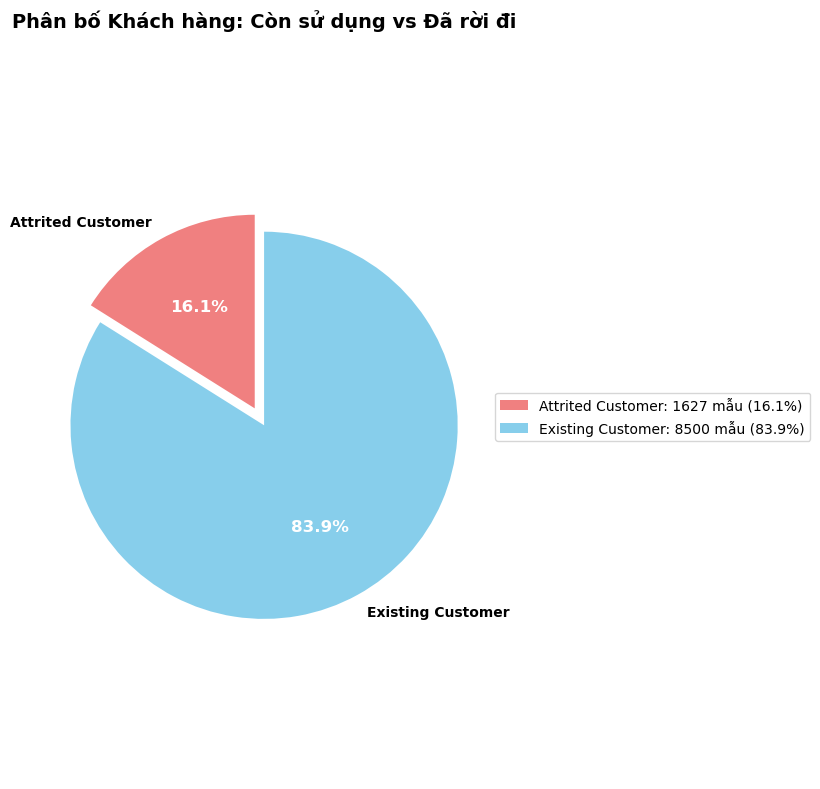

In [11]:
# Vẽ biểu đồ tròn cho target
vz.plot_target_pie_chart(
    target, 
    title="Phân bố Khách hàng: Còn sử dụng vs Đã rời đi",
    figsize=(8, 8)
)

### 3.2 Phân tích features số

In [12]:
# Sử dụng các hàm từ module để phân tích dữ liệu số
numeric_cols = dp.get_numeric_columns(features)
print("Các cột số cần phân tích:")
for col in numeric_cols:
    print(f"- {col}")

# Tính thống kê mô tả
stats = dp.calculate_numeric_stats(features, numeric_cols)
vz.print_numeric_stats(stats)

Các cột số cần phân tích:
- Customer_Age
- Dependent_count
- Months_on_book
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio
THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ

Customer_Age:
  Min: 26.00
  Max: 73.00
  Mean: 46.33
  Median: 46.00
  Std: 8.02

Dependent_count:
  Min: 0.00
  Max: 5.00
  Mean: 2.35
  Median: 2.00
  Std: 1.30

Months_on_book:
  Min: 13.00
  Max: 56.00
  Mean: 35.93
  Median: 36.00
  Std: 7.99

Total_Relationship_Count:
  Min: 1.00
  Max: 6.00
  Mean: 3.81
  Median: 4.00
  Std: 1.55

Months_Inactive_12_mon:
  Min: 0.00
  Max: 6.00
  Mean: 2.34
  Median: 2.00
  Std: 1.01

Contacts_Count_12_mon:
  Min: 0.00
  Max: 6.00
  Mean: 2.46
  Median: 2.00
  Std: 1.11

Credit_Limit:
  Min: 1438.30
  Max: 34516.00
  Mean: 8631.95
  Median: 4549.00
  Std: 9088.33

Total_Revolving_Bal:
  Min: 0.00
  Max: 2517.

#### Trực quan phân bố một vài features số quan trọng

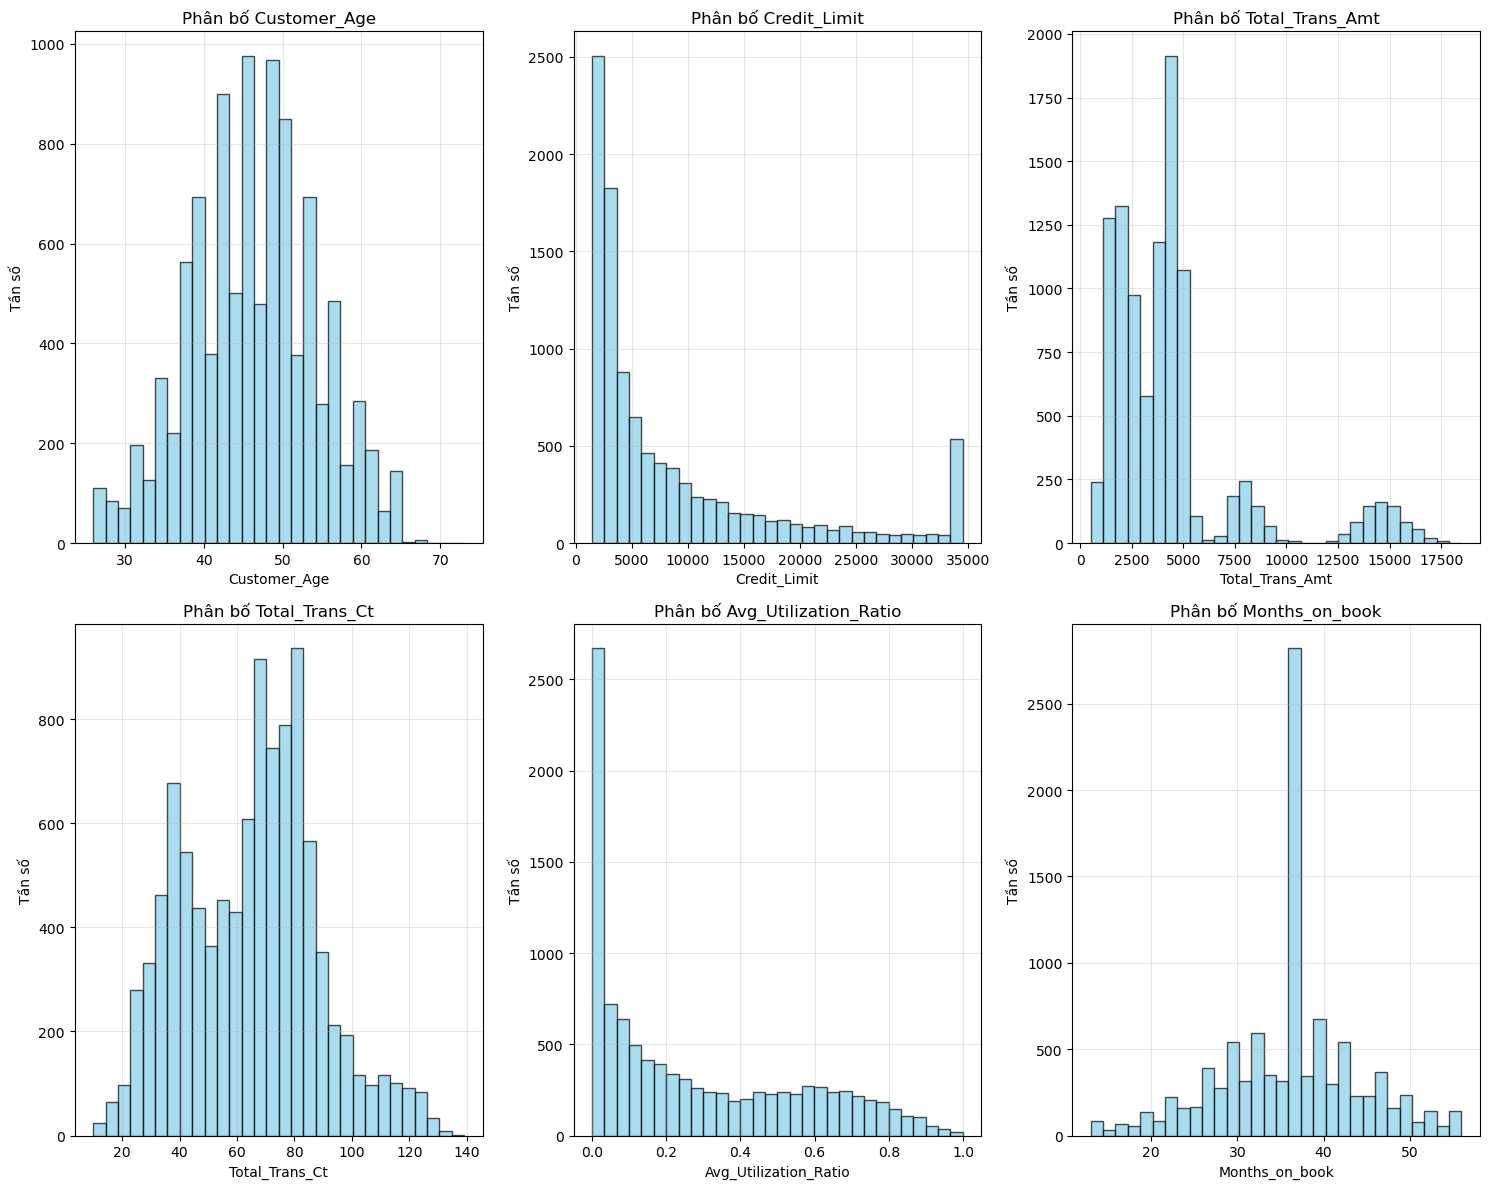

In [13]:
important_numeric_cols = [
    'Customer_Age', 
    'Credit_Limit', 
    'Total_Trans_Amt', 
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Months_on_book'
]

vz.plot_selected_distributions(
    features, 
    numeric_cols=important_numeric_cols,
    categorical_cols=None
)

### 3.3 Phân tích features phân loại

In [14]:
# Sử dụng các hàm từ module để phân tích dữ liệu phân loại
categorical_cols = dp.get_categorical_columns(features)
print("Các cột phân loại cần phân tích:")
for col in categorical_cols:
    print(f"- {col}")

# Tính phân bố của các cột phân loại
distributions = dp.calculate_categorical_distribution(features, categorical_cols)
vz.print_categorical_stats(distributions)

Các cột phân loại cần phân tích:
- Gender
- Education_Level
- Marital_Status
- Income_Category
- Card_Category
PHÂN BỐ GIÁ TRỊ CHO CÁC CỘT PHÂN LOẠI

Gender:
Số loại khác nhau: 2
  F: 5358 (52.9%)
  M: 4769 (47.1%)

Education_Level:
Số loại khác nhau: 7
  College: 1013 (10.0%)
  Doctorate: 451 (4.5%)
  Graduate: 3128 (30.9%)
  High School: 2013 (19.9%)
  Post-Graduate: 516 (5.1%)
  Uneducated: 1487 (14.7%)
  Unknown: 1519 (15.0%)
Có giá trị thiếu hoặc không xác định!

Marital_Status:
Số loại khác nhau: 4
  Divorced: 748 (7.4%)
  Married: 4687 (46.3%)
  Single: 3943 (38.9%)
  Unknown: 749 (7.4%)
Có giá trị thiếu hoặc không xác định!

Income_Category:
Số loại khác nhau: 6
  $120K +: 727 (7.2%)
  $40K - $60K: 1790 (17.7%)
  $60K - $80K: 1402 (13.8%)
  $80K - $120K: 1535 (15.2%)
  Less than $40K: 3561 (35.2%)
  Unknown: 1112 (11.0%)
Có giá trị thiếu hoặc không xác định!

Card_Category:
Số loại khác nhau: 4
  Blue: 9436 (93.2%)
  Gold: 116 (1.1%)
  Platinum: 20 (0.2%)
  Silver: 555 (5.5%)


#### Trực quan phân bố các features phân loại

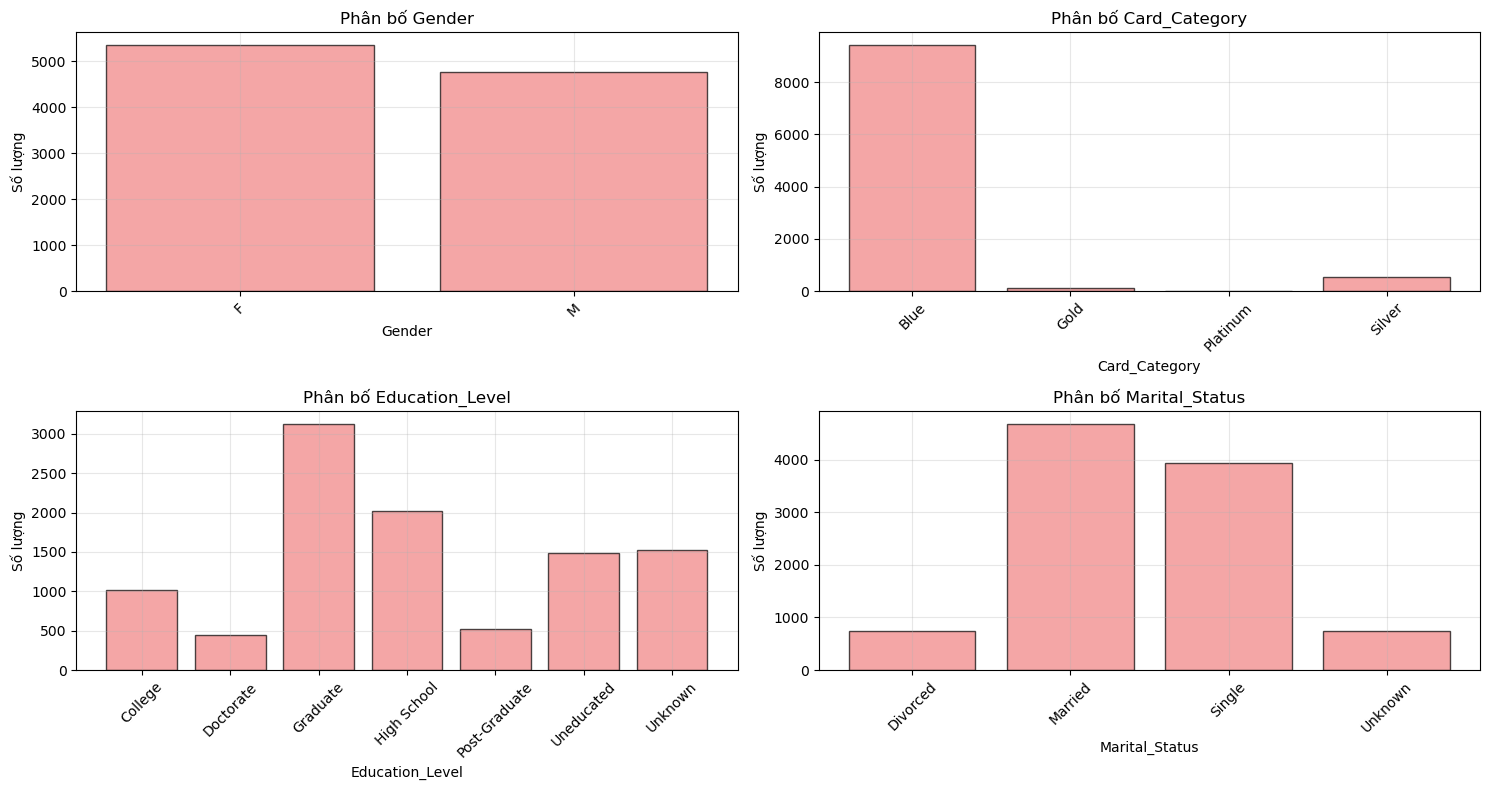

In [15]:
# Sử dụng các hàm visualization để vẽ biểu đồ
vz.plot_selected_distributions(
    features, 
    numeric_cols=None,
    categorical_cols=['Gender', 'Card_Category', 'Education_Level', 'Marital_Status']
)

## 4. Phân tích business insights

### Câu hỏi 1: Phân tích nhóm tuổi khách hàng. Nhóm tuổi nào sử dụng thẻ ngân hàng nhiều nhất?

In [16]:
# Câu 1: 
ages = data_new['Customer_Age']
mean_age = np.mean(ages)
median_age = np.median(ages)

print("=== PHÂN TÍCH ĐỘ TUỔI KHÁCH HÀNG ===")
print(f"Độ tuổi trung bình: {mean_age:.1f} tuổi")
print(f"Độ tuổi trung vị: {median_age:.1f} tuổi")
print(f"Độ tuổi nhỏ nhất: {np.min(ages)} tuổi")
print(f"Độ tuổi lớn nhất: {np.max(ages)} tuổi")

# Chia ra các nhóm tuổi
age_ranges = {
    '18-30': (ages >= 18) & (ages <= 30),
    '31-40': (ages >= 31) & (ages <= 40), 
    '41-50': (ages >= 41) & (ages <= 50),
    '51-60': (ages >= 51) & (ages <= 60),
    '61+': ages >= 61
}

print("\n=== PHÂN BỐ THEO NHÓM TUỔI ===")
max_count = 0
dominant_group = ""

for age_range, mask in age_ranges.items():
    count = np.sum(mask)
    percentage = count / len(ages) * 100
    print(f"Nhóm {age_range}: {count:,} người ({percentage:.1f}%)")
    
    if count > max_count:
        max_count = count
        dominant_group = age_range

print(f"\nNhóm tuổi sử dụng thẻ tín dụng nhiều nhất: {dominant_group} với {max_count:,} người ({max_count/len(ages)*100:.1f}%)")

=== PHÂN TÍCH ĐỘ TUỔI KHÁCH HÀNG ===
Độ tuổi trung bình: 46.3 tuổi
Độ tuổi trung vị: 46.0 tuổi
Độ tuổi nhỏ nhất: 26 tuổi
Độ tuổi lớn nhất: 73 tuổi

=== PHÂN BỐ THEO NHÓM TUỔI ===
Nhóm 18-30: 265 người (2.6%)
Nhóm 31-40: 2,132 người (21.1%)
Nhóm 41-50: 4,652 người (45.9%)
Nhóm 51-60: 2,673 người (26.4%)
Nhóm 61+: 405 người (4.0%)

Nhóm tuổi sử dụng thẻ tín dụng nhiều nhất: 41-50 với 4,652 người (45.9%)


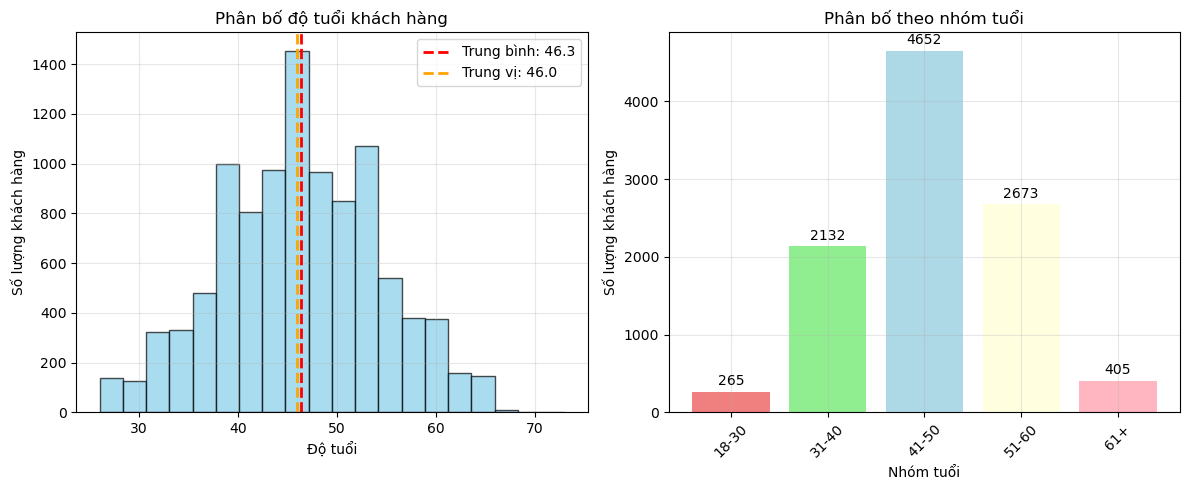

In [17]:
# Vẽ biểu đồ phân bố độ tuổi sử dụng
vz.plot_age_analysis(ages)

### Câu hỏi 2: Nhóm khách hàng có thu nhập như thế nào thì dễ rời đi?

In [18]:
income_categories = np.unique(data_new['Income_Category'])
attrition_by_income = {}

print("=== PHÂN TÍCH THU NHẬP VÀ TỶ LỆ RỜI ĐI ===")
total_customers = len(data_new)
total_attrited = np.sum(target == "Attrited Customer")

for income in income_categories:
    mask = data_new['Income_Category'] == income
    total_in_category = np.sum(mask)
    attrited_in_category = np.sum((data_new['Income_Category'] == income) & (target == "Attrited Customer"))
    
    churn_rate = attrited_in_category / total_in_category * 100 if total_in_category > 0 else 0
    percentage_of_total = total_in_category / total_customers * 100
    
    attrition_by_income[income] = {
        'total': total_in_category,
        'attrited': attrited_in_category,
        'churn_rate': churn_rate,
        'percentage': percentage_of_total
    }
    
    print(f"\n{income}:")
    print(f"  - Tổng số khách hàng: {total_in_category:,} ({percentage_of_total:.1f}%)")
    print(f"  - Số khách rời đi: {attrited_in_category:,}")
    print(f"  - Tỷ lệ rời đi: {churn_rate:.1f}%")

# Tìm nhóm thu nhập có tỷ lệ rời đi cao nhất
highest_churn_income = max(attrition_by_income.keys(), 
                          key=lambda x: attrition_by_income[x]['churn_rate'])
highest_churn_rate = attrition_by_income[highest_churn_income]['churn_rate']

print(f"\nNhóm thu nhập dễ rời đi nhất: {highest_churn_income}")
print(f"Tỷ lệ rời đi: {highest_churn_rate:.1f}%")

=== PHÂN TÍCH THU NHẬP VÀ TỶ LỆ RỜI ĐI ===

$120K +:
  - Tổng số khách hàng: 727 (7.2%)
  - Số khách rời đi: 126
  - Tỷ lệ rời đi: 17.3%

$40K - $60K:
  - Tổng số khách hàng: 1,790 (17.7%)
  - Số khách rời đi: 271
  - Tỷ lệ rời đi: 15.1%

$60K - $80K:
  - Tổng số khách hàng: 1,402 (13.8%)
  - Số khách rời đi: 189
  - Tỷ lệ rời đi: 13.5%

$80K - $120K:
  - Tổng số khách hàng: 1,535 (15.2%)
  - Số khách rời đi: 242
  - Tỷ lệ rời đi: 15.8%

Less than $40K:
  - Tổng số khách hàng: 3,561 (35.2%)
  - Số khách rời đi: 612
  - Tỷ lệ rời đi: 17.2%

Unknown:
  - Tổng số khách hàng: 1,112 (11.0%)
  - Số khách rời đi: 187
  - Tỷ lệ rời đi: 16.8%

Nhóm thu nhập dễ rời đi nhất: $120K +
Tỷ lệ rời đi: 17.3%


/home/xv6/Lab 2/Credit Card Customer Analysis/src/visualization.py:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(incomes, rotation=45, ha='right')


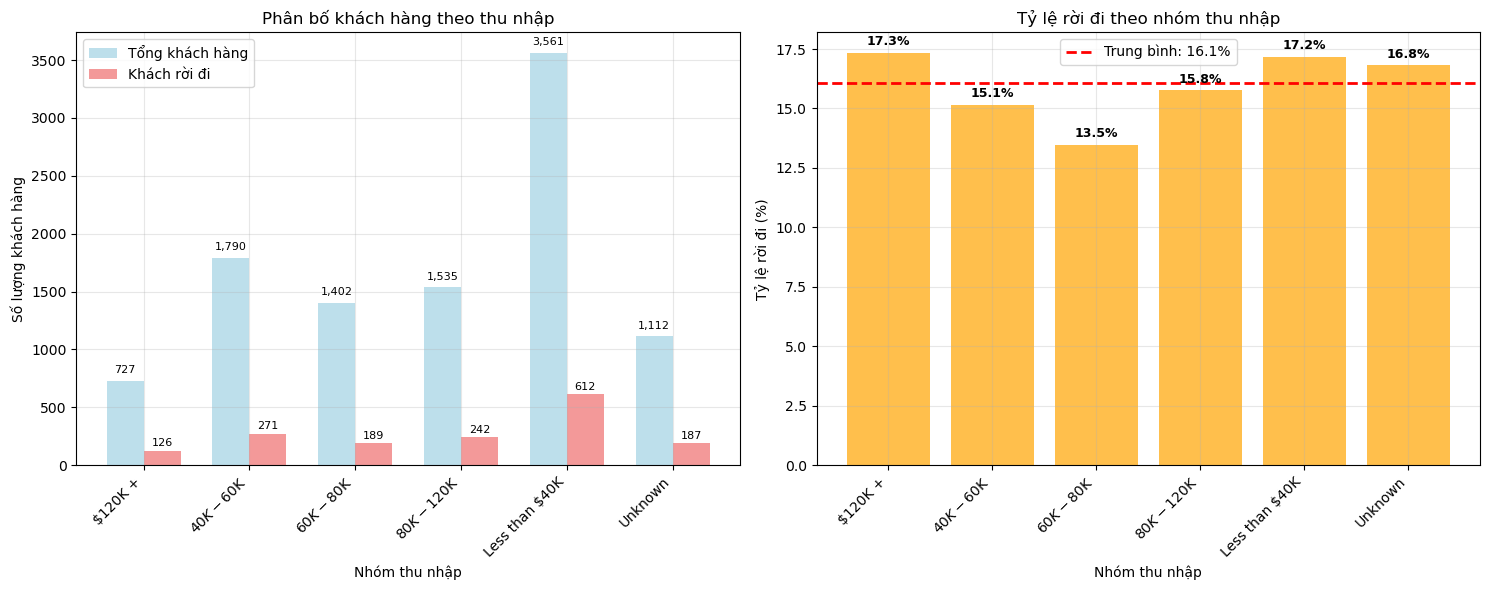

In [19]:
# Vẽ biểu đồ phân tích thu nhập và tỷ lệ rời đi
vz.plot_income_churn_analysis(data_new, target)

### Câu hỏi 3: Khách hàng có hạng thẻ thành viên như thế nào thì dễ rời đi nhất?

In [20]:
card_categories = np.unique(data_new['Card_Category'])
attrition_by_card = {}

print("=== PHÂN TÍCH HẠNG THẺ VÀ TỶ LỆ RỜI ĐI ===")

for card in card_categories:
    mask = data_new['Card_Category'] == card
    total_in_category = np.sum(mask)
    attrited_in_category = np.sum((data_new['Card_Category'] == card) & (target == "Attrited Customer"))
    
    churn_rate = attrited_in_category / total_in_category * 100 if total_in_category > 0 else 0
    percentage_of_total = total_in_category / total_customers * 100
    
    attrition_by_card[card] = {
        'total': total_in_category,
        'attrited': attrited_in_category,
        'churn_rate': churn_rate,
        'percentage': percentage_of_total
    }
    
    print(f"\nThẻ {card}:")
    print(f"  - Tổng số khách hàng: {total_in_category:,} ({percentage_of_total:.1f}%)")
    print(f"  - Số khách rời đi: {attrited_in_category:,}")
    print(f"  - Tỷ lệ rời đi: {churn_rate:.1f}%")

# Sắp xếp theo tỷ lệ rời đi từ cao đến thấp
sorted_cards = sorted(attrition_by_card.items(), key=lambda x: x[1]['churn_rate'], reverse=True)

print(f"\n=== XẾP HẠNG THEO TỶ LỆ RỜI ĐI ===")
for i, (card, data) in enumerate(sorted_cards, 1):
    print(f"{i}. Thẻ {card}: {data['churn_rate']:.1f}%")

print(f"\nThẻ dễ rời đi nhất: {sorted_cards[0][0]} ({sorted_cards[0][1]['churn_rate']:.1f}%)")

=== PHÂN TÍCH HẠNG THẺ VÀ TỶ LỆ RỜI ĐI ===

Thẻ Blue:
  - Tổng số khách hàng: 9,436 (93.2%)
  - Số khách rời đi: 1,519
  - Tỷ lệ rời đi: 16.1%

Thẻ Gold:
  - Tổng số khách hàng: 116 (1.1%)
  - Số khách rời đi: 21
  - Tỷ lệ rời đi: 18.1%

Thẻ Platinum:
  - Tổng số khách hàng: 20 (0.2%)
  - Số khách rời đi: 5
  - Tỷ lệ rời đi: 25.0%

Thẻ Silver:
  - Tổng số khách hàng: 555 (5.5%)
  - Số khách rời đi: 82
  - Tỷ lệ rời đi: 14.8%

=== XẾP HẠNG THEO TỶ LỆ RỜI ĐI ===
1. Thẻ Platinum: 25.0%
2. Thẻ Gold: 18.1%
3. Thẻ Blue: 16.1%
4. Thẻ Silver: 14.8%

Thẻ dễ rời đi nhất: Platinum (25.0%)


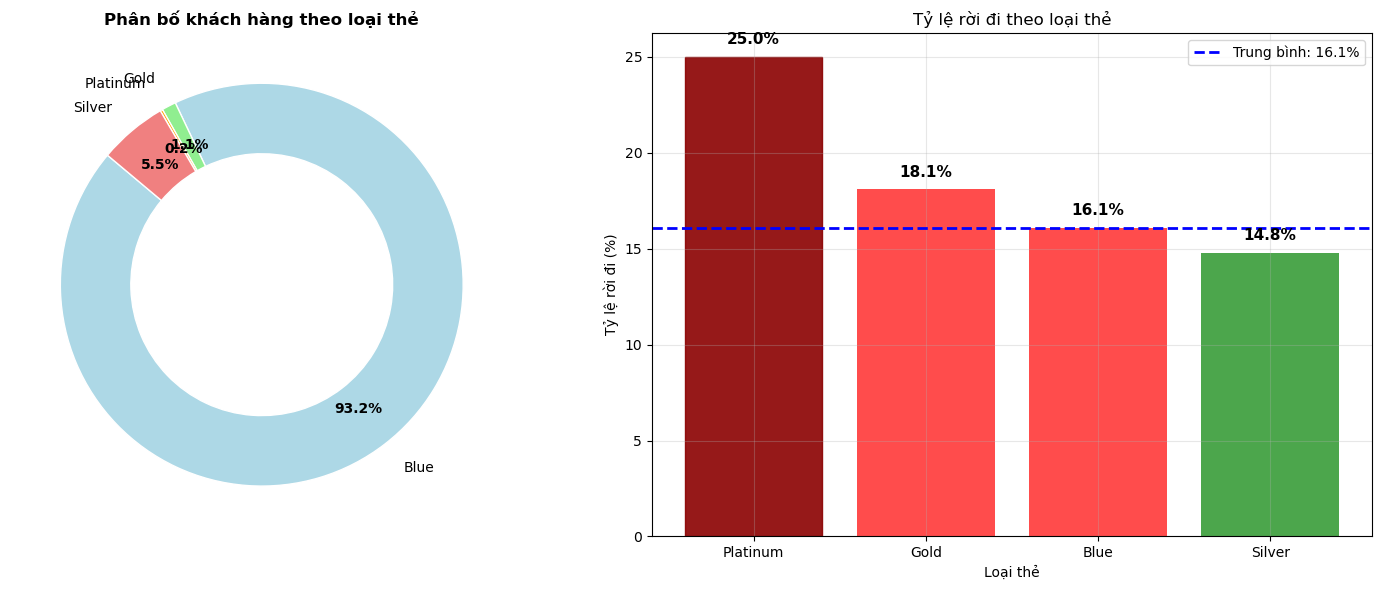

In [21]:
# Vẽ biểu đồ phân tích hạng thẻ và churn sử dụng hàm từ visualization module
vz.plot_card_churn_analysis(data_new, target)

### Câu hỏi 4: Tổng số tiền giao dịch của nhóm khách rời đi như thế nào so với nhóm khách còn sử dụng?

In [22]:
# Câu 4: So sánh tổng tiền giao dịch giữa 2 nhóm khách hàng
trans_amt_existing = data_new['Total_Trans_Amt'][target == "Existing Customer"]
trans_amt_attrited = data_new['Total_Trans_Amt'][target == "Attrited Customer"]

print("=== PHÂN TÍCH TỔNG TIỀN GIAO DỊCH ===")

# Thống kê mô tả cho nhóm còn sử dụng
print("Khách hàng còn sử dụng:")
print(f"  - Số lượng: {len(trans_amt_existing):,}")
print(f"  - Trung bình: ${np.mean(trans_amt_existing):,.2f}")
print(f"  - Trung vị: ${np.median(trans_amt_existing):,.2f}")
print(f"  - Độ lệch chuẩn: ${np.std(trans_amt_existing):,.2f}")
print(f"  - Min: ${np.min(trans_amt_existing):,.2f}")
print(f"  - Max: ${np.max(trans_amt_existing):,.2f}")

print("\nKhách hàng đã rời đi:")
print(f"  - Số lượng: {len(trans_amt_attrited):,}")
print(f"  - Trung bình: ${np.mean(trans_amt_attrited):,.2f}")
print(f"  - Trung vị: ${np.median(trans_amt_attrited):,.2f}")
print(f"  - Độ lệch chuẩn: ${np.std(trans_amt_attrited):,.2f}")
print(f"  - Min: ${np.min(trans_amt_attrited):,.2f}")
print(f"  - Max: ${np.max(trans_amt_attrited):,.2f}")

# So sánh
diff_mean = np.mean(trans_amt_existing) - np.mean(trans_amt_attrited)

print(f"\n=== SO SÁNH ===")
print(f"Chênh lệch trung bình: ${diff_mean:,.2f}")

if diff_mean > 0:
    print(f"Khách hàng còn sử dụng có tổng tiền giao dịch cao hơn {diff_mean:,.2f}$ so với khách hàng đã rời đi")
else:
    print(f"Khách hàng đã rời đi có tổng tiền giao dịch cao hơn {abs(diff_mean):,.2f}$ so với khách hàng còn sử dụng")


=== PHÂN TÍCH TỔNG TIỀN GIAO DỊCH ===
Khách hàng còn sử dụng:
  - Số lượng: 8,500
  - Trung bình: $4,654.66
  - Trung vị: $4,100.00
  - Độ lệch chuẩn: $3,512.57
  - Min: $816.00
  - Max: $18,484.00

Khách hàng đã rời đi:
  - Số lượng: 1,627
  - Trung bình: $3,095.03
  - Trung vị: $2,329.00
  - Độ lệch chuẩn: $2,307.52
  - Min: $510.00
  - Max: $10,583.00

=== SO SÁNH ===
Chênh lệch trung bình: $1,559.63
Khách hàng còn sử dụng có tổng tiền giao dịch cao hơn 1,559.63$ so với khách hàng đã rời đi


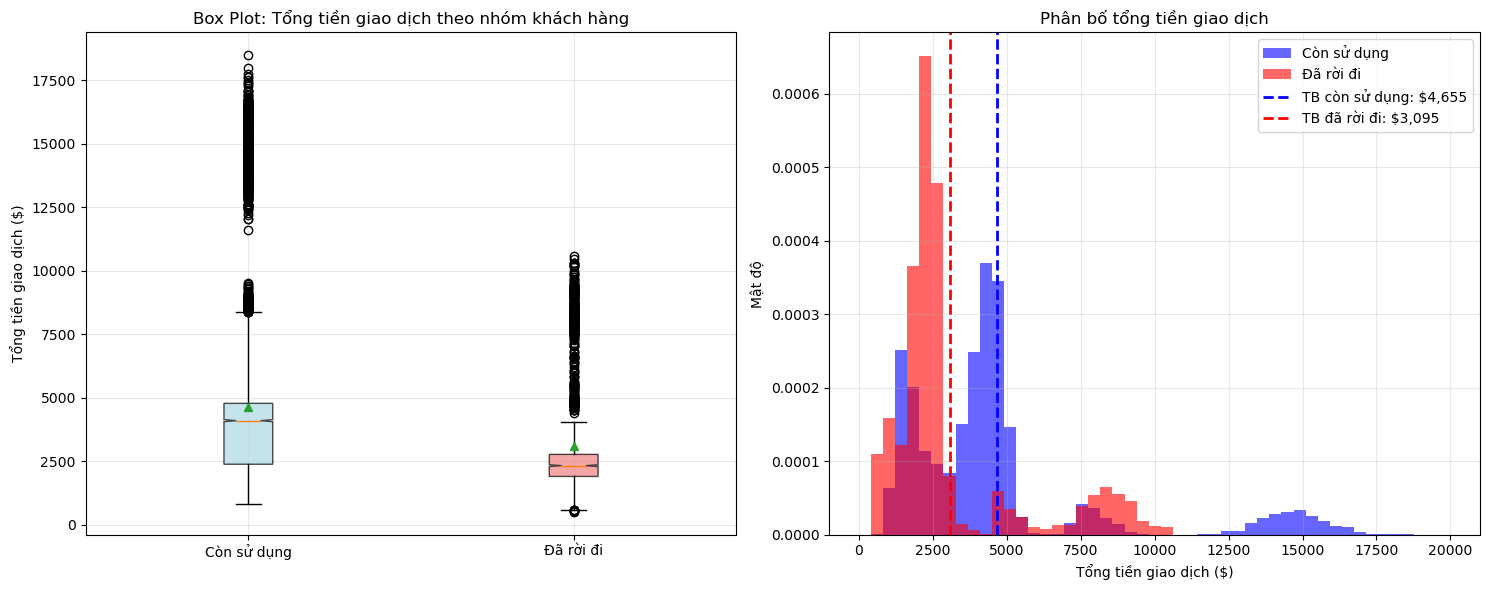

In [23]:
# Vẽ biểu đồ so sánh tổng tiền giao dịch 
vz.plot_transaction_comparison(data_new, target)

### Câu hỏi 5: Tỷ lệ sử dụng thẻ của nhóm khách hàng rời đi có thấp hơn nhóm còn lại không?

In [24]:
# Câu 5: So sánh tỷ lệ sử dụng thẻ giữa 2 nhóm khách hàng
util_ratio_existing = data_new['Avg_Utilization_Ratio'][target == "Existing Customer"]
util_ratio_attrited = data_new['Avg_Utilization_Ratio'][target == "Attrited Customer"]

print("=== PHÂN TÍCH TỶ LỆ SỬ DỤNG THẺ ===")

# Thống kê mô tả
print("Khách hàng còn sử dụng:")
print(f"  - Số lượng: {len(util_ratio_existing):,}")
print(f"  - Trung bình: {np.mean(util_ratio_existing):.3f} ({np.mean(util_ratio_existing)*100:.1f}%)")
print(f"  - Trung vị: {np.median(util_ratio_existing):.3f} ({np.median(util_ratio_existing)*100:.1f}%)")
print(f"  - Độ lệch chuẩn: {np.std(util_ratio_existing):.3f}")
print(f"  - Min: {np.min(util_ratio_existing):.3f}")
print(f"  - Max: {np.max(util_ratio_existing):.3f}")

print("\nKhách hàng đã rời đi:")
print(f"  - Số lượng: {len(util_ratio_attrited):,}")
print(f"  - Trung bình: {np.mean(util_ratio_attrited):.3f} ({np.mean(util_ratio_attrited)*100:.1f}%)")
print(f"  - Trung vị: {np.median(util_ratio_attrited):.3f} ({np.median(util_ratio_attrited)*100:.1f}%)")
print(f"  - Độ lệch chuẩn: {np.std(util_ratio_attrited):.3f}")
print(f"  - Min: {np.min(util_ratio_attrited):.3f}")
print(f"  - Max: {np.max(util_ratio_attrited):.3f}")

# So sánh
diff_mean = np.mean(util_ratio_existing) - np.mean(util_ratio_attrited)

print(f"\n=== SO SÁNH ===")
print(f"Chênh lệch trung bình: {diff_mean:.3f} ({diff_mean*100:.1f}%)")

if diff_mean > 0:
    print(f"Khách hàng còn sử dụng có tỷ lệ sử dụng thẻ cao hơn {diff_mean*100:.1f}% so với khách hàng đã rời đi")
else:
    print(f"Khách hàng đã rời đi có tỷ lệ sử dụng thẻ cao hơn {abs(diff_mean)*100:.1f}% so với khách hàng còn sử dụng")

# Kiểm định thống kê (z-test)
n1, n2 = len(util_ratio_existing), len(util_ratio_attrited)
mean1, mean2 = np.mean(util_ratio_existing), np.mean(util_ratio_attrited)
var1, var2 = np.var(util_ratio_existing, ddof=1), np.var(util_ratio_attrited, ddof=1)

z_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)
z_critical = 1.96  # mức ý nghĩa 0.05

print(f"\n=== KIỂM ĐỊNH THỐNG KÊ ===")
print("Kiểm định z-test cho sự khác biệt về tỷ lệ sử dụng thẻ giữa 2 nhóm khách hàng")
print(f"Giả thuyết H0: Không có sự khác biệt về tỷ lệ sử dụng thẻ giữa 2 nhóm")
print("Giả thuyết H1: Có sự khác biệt về tỷ lệ sử dụng thẻ giữa 2 nhóm")

print(f"\nGiá trị z: {z_stat:.4f}")
print(f"Giá trị tới hạn: ±{z_critical}")

if abs(z_stat) > z_critical:
    print("Kết luận: CÓ SỰ KHÁC BIỆT có ý nghĩa thống kê về tỷ lệ sử dụng thẻ giữa 2 nhóm")
else:
    print("Kết luận: KHÔNG CÓ SỰ KHÁC BIỆT có ý nghĩa thống kê về tỷ lệ sử dụng thẻ giữa 2 nhóm")

=== PHÂN TÍCH TỶ LỆ SỬ DỤNG THẺ ===
Khách hàng còn sử dụng:
  - Số lượng: 8,500
  - Trung bình: 0.296 (29.6%)
  - Trung vị: 0.211 (21.1%)
  - Độ lệch chuẩn: 0.273
  - Min: 0.000
  - Max: 0.994

Khách hàng đã rời đi:
  - Số lượng: 1,627
  - Trung bình: 0.162 (16.2%)
  - Trung vị: 0.000 (0.0%)
  - Độ lệch chuẩn: 0.264
  - Min: 0.000
  - Max: 0.999

=== SO SÁNH ===
Chênh lệch trung bình: 0.134 (13.4%)
Khách hàng còn sử dụng có tỷ lệ sử dụng thẻ cao hơn 13.4% so với khách hàng đã rời đi

=== KIỂM ĐỊNH THỐNG KÊ ===
Kiểm định z-test cho sự khác biệt về tỷ lệ sử dụng thẻ giữa 2 nhóm khách hàng
Giả thuyết H0: Không có sự khác biệt về tỷ lệ sử dụng thẻ giữa 2 nhóm
Giả thuyết H1: Có sự khác biệt về tỷ lệ sử dụng thẻ giữa 2 nhóm

Giá trị z: 18.6228
Giá trị tới hạn: ±1.96
Kết luận: CÓ SỰ KHÁC BIỆT có ý nghĩa thống kê về tỷ lệ sử dụng thẻ giữa 2 nhóm


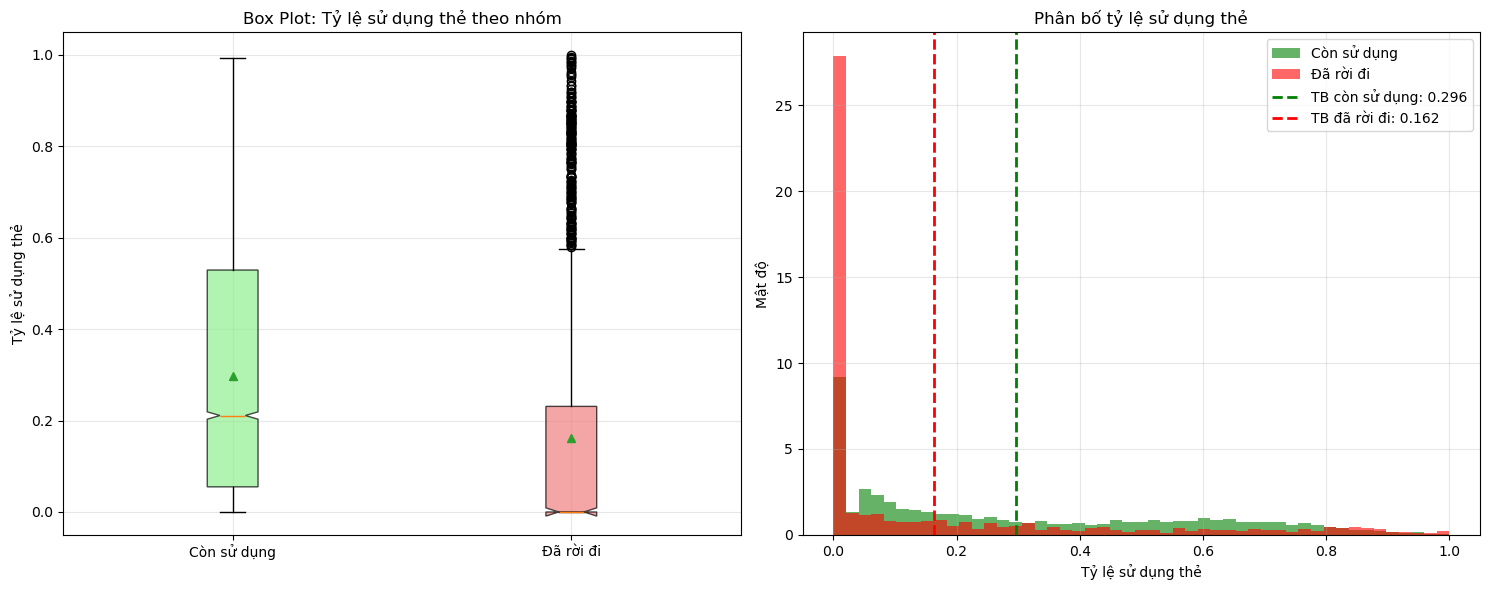

In [25]:
# Vẽ biểu đồ so sánh tỷ lệ sử dụng thẻ sử dụng hàm từ visualization module
vz.plot_utilization_comparison(data_new, target)

## 5. Tóm tắt kết quả phân tích

### Những phát hiện chính:

**1. Độ tuổi khách hàng:**
- Độ tuổi trung bình: khoảng 46-47 tuổi
- Nhóm tuổi chiếm đa số: 41-50 tuổi

**2. Thu nhập và tỷ lệ rời đi:**
- Khách hàng có thu nhập thấp hơn (`<$40K`) và cao hơn (`>$120K`) có xu hướng rời đi nhiều hơn
- Tỷ lệ rời đi của các khách hàng ở các mức thu nhập còn lại không có xu hướng rời đi cao như hai nhóm trên.

**3. Loại thẻ và tỷ lệ rời đi:**
- Thẻ Blue có số lượng người rời đi nhiều nhất và thẻ Platinum có số lượng người rời đi ít nhất.
- Tuy nhiên, thẻ Platinum có tỷ lệ rời đi cao nhất còn thẻ Blue có tỷ lệ rời đi thấp hơn

**4. Tổng tiền giao dịch:**
- Khách hàng đã rời đi có tổng tiền giao dịch thấp hơn đáng kể
- Điều này cho thấy mức độ tương tác thấp có thể là dấu hiệu cảnh báo

**5. Tỷ lệ sử dụng thẻ:**
- Khách hàng đã rời đi có tỷ lệ sử dụng thẻ thấp hơn rõ rệt
- Sự khác biệt này có ý nghĩa thống kê cao